In [74]:
import pandas as pd
import numpy as np
import cufflinks as cf

In [46]:
btc_df = pd.read_csv('data/btc_221220.csv')
btc_df['Open_time'] = pd.to_datetime(btc_df['Open_time'])
btc_df['hour'] = btc_df['Open_time'].dt.hour

## Preprocess

In [47]:
def select_by_year(df, year):
    return df[btc_df['Open_time'].dt.year == int(year)].reset_index(drop=True)

In [48]:
def close_ratio(df, period=1):
    return df['Close'].pct_change(period).shift(-period)

In [128]:
btc_df_2020 = select_by_year(btc_df, 2022)

In [129]:
btc_df_2020['Change'] = close_ratio(btc_df_2020, 2)

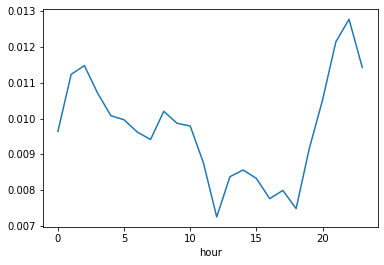

In [130]:
btc_df_2020.groupby('hour').std()['Change'].plot()

In [89]:
size = btc_df_2020.groupby('hour').size().iloc[0]

In [91]:
n = 10000
candidates = []
for i in range(n):
    candidates.append(btc_df_2020.sample(size)['Change2'].mean())

In [92]:
btc_df_2020.groupby('hour').mean()['Change2'].sort_values()

hour
10   -0.001757
22   -0.001173
11   -0.000695
9    -0.000595
21   -0.000333
3    -0.000149
6     0.000039
16    0.000132
17    0.000157
19    0.000199
12    0.000220
1     0.000254
0     0.000301
18    0.000319
2     0.000379
15    0.000547
7     0.000580
23    0.000587
14    0.000636
13    0.000692
4     0.000928
8     0.001029
5     0.001202
20    0.001372
Name: Change2, dtype: float64

In [93]:
np.mean(np.array(candidates) > 0.001372)

0.0401

In [94]:
np.mean(np.array(candidates) < -0.001757)

0.0016